<a href="https://colab.research.google.com/github/MLcmore2023/MLcmore2023/blob/main/day3_am_morning/linear-regression-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression
Linear regression is a supervised machine learning algorithm that aims to predict a continuous target variable (y) based on a set of independent variables (X). It finds a linear relationship between the input variables and the output variable by fitting a straight line (or plane) to the training data points. The algorithm learns the optimal coefficients for the line by minimizing the sum of squared differences between the predicted and actual values. When a prediction is needed, the algorithm uses the learned coefficients to estimate the target variable based on the given input variables, providing a continuous numerical prediction.

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression1.png" alt="image" width=60%>

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression1a.png" alt="image" width=80%>

This image shows a linear regression between 1 input variable and 1 output variable. In real world use cases, there can be as many input variables as necessary

for example:
predicted_price = crime_rate\*0.5 + #rooms\*0.1 + area\*34 + ... + tax_rate\*-3 + 24 (random example



### Import libraries and initialize random generator

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
#limit the stout printing of large arrays so only up to 10 elements are shown a time
np.set_printoptions(threshold=10)

### Read data from CSV
We will use the Boston Housing dataset. This dataset consists of 13 input features related to housing prices in Boston, such as crime rate and average number of rooms. We are going predict housing price based on 13 features.

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression2.png" alt="image" width=90%>


In [ ]:
dataset = pd.read_csv("/kaggle/input/boston-housing/boston_housing.csv")
display(dataset)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Linear regression coefficients
Using the equation from the beginning of this tutorial, we want to find a set of coefficients (β0,β1,β2...) such that the errors are as small as possible.

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression3.png" alt="image" width=40%>

The above can be written in matrix form:

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression4.png" alt="image" width=40%>


In [ ]:
#put the columns of ones into the front of the dataset
print("before:")
display(dataset)

dataset.insert(0, 'intercept', 1)
print("after:")
display(dataset)

before:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


after:


,intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,1,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,1,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,1,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Extract features (independent variables) and target variable


In [ ]:
X = dataset.drop("medv", axis=1).values # the input variable is all columns except the median price
y = dataset["medv"].values # the output variable is the median price
print(X[0:5])
print(y[0:5])

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 [1.0000e+00 3.2370e-02 0.0000e+00 ... 1.8700e+01 3.9463e+02 2.9400e+00]
 [1.0000e+00 6.9050e-02 0.0000e+00 ... 1.8700e+01 3.9690e+02 5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


### Multicollinearity
Imagine you are trying to predict ice cream sales in a Disney Land with the amount of people in the park. Now, you are given a new variable, the amount of tickets sold today. Assuming every tourist have a ticket, the amount of tickets sold should be 100% related to the amount of people in the park. This variable is useless, because it does not give any new information.

Addressing multicollinearity (colinearity) is an important consideration when performing linear regression. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. It can lead to unstable and unreliable coefficient estimates, making it difficult to interpret the impact of individual predictors on the target variable.

To address multicollinearity, we can do any of the following:
- Removing one of the highly correlated variables.
- Transforming variables (e.g., using principal component analysis or dimensionality reduction techniques).
- Combining correlated variables into a single variable.

Text(0.5, 1.0, 'Correlation Matrix')

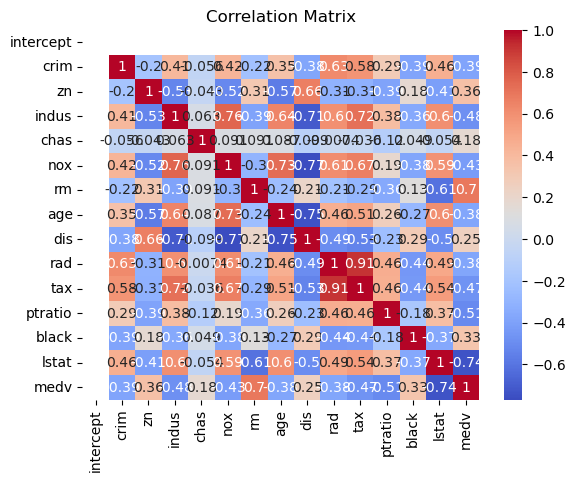

In [ ]:
#calculate correlations
correlation_matrix = dataset.corr()

#graph heat map
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

we found that `tax` and `rad` are highly correlated ( r = -0.91 ). We can drop one of them (`tax` is chose arbitrarily)

In [ ]:
dataset = dataset.drop('tax', axis=1)

### Splitting training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Least square matrix equation
<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression5.png" alt="image" width=50%>


In [ ]:
# Calculating the coefficients using the normal equation: (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(coefficients)

[ 3.80916949e+01 -1.19443447e-01  4.47799511e-02 ... -1.04592119e+00
  8.11010693e-03 -4.92792725e-01]


In [ ]:
# Making predictions for the test set
y_prediction = X_test @ coefficients
print(y_prediction)

[24.88963777 23.72141085 29.36499868 ... 17.93719475 25.30588844
 22.3732326 ]


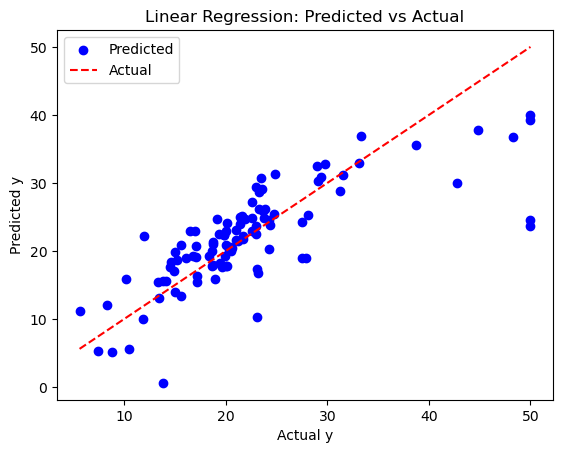

In [ ]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.scatter(y_test, y_prediction, color='b', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Actual')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()


### Evaluation
To evaluate the accuracy of a linear regression model, there are many metrics and techniques. One common method is the Mean Squared Error (MSE). It calculate the average squared difference between the predicted values and the actual values of the target variable. The lower the MSE, the better the model fits the data.

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/linear_regression6.png" alt="image" width=60%>


## Exercise
1. Imagine you are now releasing this trained model on the internet to make a housing price calculator website. Does the size of this website depend on the amount of houses in your training data?  Why or why not?
2. How many numbers are there in the `coefficients` array? Hint: our dataset have 12 features (12 input variables)
3. Predict the price of the house `Hurley_St_375` below.
4. Write code for calculating the MSE

In [ ]:
Hurley_St_375 = pd.DataFrame(
    [{  'crim': 1.2324700000000002,
        'zn': 0.0,
        'indus': 8.14,
        'chas': 0,
        'nox': 0.538,
        'rm': 6.142,
        'age': 91.7,
        'dis': 3.9769,
        'rad': 4,
        'tax': 307.0,
        'ptratio': 21.0,
        'black': 396.9,
        'lstat': 18.72,
        'medv': 15.2,
        }])
display(Hurley_St_375)

#code here
price = None #replace this with code

print("Hurley_St_375 should costs about",price,"thousand US dollars")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.9,18.72,15.2


Hurley_St_375 should costs about None thousand US dollars


In [ ]:
# solution for question 1:
# no. All we need is to share the 14 numbers (the beta coefficients)
# solution for question 2:
#14. see print(len(coefficients))

In [ ]:
#exercise: code here
"""
SOLUTION:
# Calculate the squared differences between the actual and predicted values
squared_errors = (y_test - y_prediction) ** 2

# Calculate the mean of the squared errors
mse = np.mean(squared_errors)

print("Mean Squared Error:", mse)
"""

'\nSOLUTION:\n# Calculate the squared differences between the actual and predicted values\nsquared_errors = (y_test - y_prediction) ** 2\n\n# Calculate the mean of the squared errors\nmse = np.mean(squared_errors)\n\nprint("Mean Squared Error:", mse)\n'

## Reference
- https://online.stat.psu.edu/stat462/node/132/
- https://online.stat.psu.edu/stat462/node/177/